In [52]:
import mne
from MNE_Pipeline import MNE_Repo_Mat as MP
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
epoch = mne.read_epochs('epochs/N10_epoch.fif')

Reading epochs/N10_epoch.fif ...
    Found the data of interest:
        t =    -200.00 ...     798.00 ms
        0 CTF compensation matrices available


<ipython-input-2-aa19c275b6da>:1: RuntimeWarning: This filename (epochs/N10_epoch.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epoch = mne.read_epochs('epochs/N10_epoch.fif')


750 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [3]:
mne_pp = MP()

/home/kam/anaconda3/envs/mne/lib/python3.7/site-packages/mne/utils/docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/home/kam/anaconda3/envs/mne/lib/python3.7/site-packages/mne/utils/docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/kam/CP Project/MNE_Pipeline.py:34: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, 

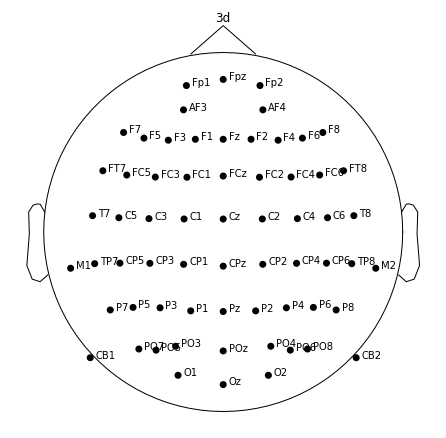

/home/kam/CP Project/MNE_Pipeline.py:40: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemus_isotrak``, or ``read_dig_captrack`` ``read_dig_hpts``, ``read_dig_captrack`` or ``read_custom_montage`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays.
  self.info = mne.create_info(montage.ch_names, sfreq, ch_types='eeg', montage=montage)


In [4]:
info = mne_pp.construct_info()

0 files missing from /home/kam/anaconda3/envs/mne/lib/python3.7/site-packages/mne/datasets/_fsaverage/root.txt in /home/kam/mne_data/MNE-fsaverage-data
0 files missing from /home/kam/anaconda3/envs/mne/lib/python3.7/site-packages/mne/datasets/_fsaverage/bem.txt in /home/kam/mne_data/MNE-fsaverage-data/fsaverage


/home/kam/anaconda3/envs/mne/lib/python3.7/site-packages/mne/utils/docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/home/kam/anaconda3/envs/mne/lib/python3.7/site-packages/mne/utils/docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/kam/CP Project/MNE_Pipeline.py:34: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, 

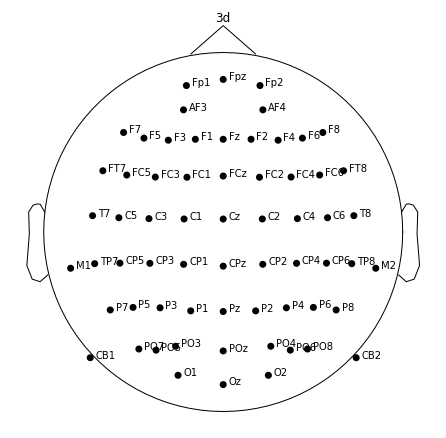

    Reading a source space...
    Computing patch statistics...
    Patch information added...


/home/kam/CP Project/MNE_Pipeline.py:119: RuntimeWarning: This filename (source_space/src_space.fif) does not conform to MNE naming conventions. All source space files should end with -src.fif, -src.fif.gz, _src.fif, _src.fif.gz, -fwd.fif, -fwd.fif.gz, _fwd.fif, _fwd.fif.gz, -inv.fif, -inv.fif.gz, _inv.fif or _inv.fif.gz
  src = mne.read_source_spaces('source_space/src_space.fif')


    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
Loading surfaces...
Three-layer model surfaces loaded.

Loading the solution matrix...

Loaded linear_collocation BEM solution from bem/fsaverage_bem.fif


In [5]:
montage, src, bem = MP.init_exp_for_sl()

In [6]:
src[0].keys()

dict_keys(['id', 'type', 'np', 'ntri', 'coord_frame', 'rr', 'nn', 'tris', 'nuse', 'inuse', 'vertno', 'nuse_tri', 'use_tris', 'nearest', 'nearest_dist', 'pinfo', 'patch_inds', 'dist', 'dist_limit', 'subject_his_id'])

In [7]:
fwd = mne_pp.compute_forward_sol(mne_pp.info, src, bem)
cov = mne_pp.compute_covariance_mat(epoch)
inv = mne_pp.create_inverse_operator(mne_pp.info, cov, fwd, 0.2, 0.8)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=4098, coordinate_frame=MRI (surface RAS)>, <surface (rh), n_vertices=163842, n_used=4098, coordinate_frame=MRI (surface RAS)>]>
MRI -> head transform : instance of Transform
Measurement data      : instance of Info
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 8196 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999310  0.009985 -0.035787      -3.17 mm
     0.012759  0.812405  0.582954       6.86 mm
     0.034894 -0.583008  0.811716      28.88 mm
     0.000000  0.000000  0.000000       1.00

Read  64 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Employing the head->MRI coordinate transform with the BEM model.
BEM model instance of ConductorModel is now set up

Source spaces are in head c

/home/kam/CP Project/MNE_Pipeline.py:147: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  return mne.minimum_norm.make_inverse_operator(info=info, noise_cov=cov, forward=fwd, loose=loose, depth=depth)
/home/kam/CP Project/MNE_Pipeline.py:147: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  return mne.minimum_norm.make_inverse_operator(info=info, noise_cov=cov, forward=fwd, loose=loose, depth=depth)


In [13]:
snr = 1.
lambda2 = 1. / snr ** 2
stc_epochs = mne.minimum_norm.apply_inverse_epochs(epoch, inv, lambda2, method='sLORETA', pick_ori='normal', 
                                                   return_generator=False)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 64 (0 small eigenvalues omitted)
    Computing noise-normalization factors (sLORETA)...
[done]
Picked 64 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Processing epoch : 1 / 750
Processing epoch : 2 / 750
Processing epoch : 3 / 750
Processing epoch : 4 / 750
Processing epoch : 5 / 750
Processing epoch : 6 / 750
Processing epoch : 7 / 750
Processing epoch : 8 / 750
Processing epoch : 9 / 750
Processing epoch : 10 / 750
Processing epoch : 11 / 750
Processing epoch : 12 / 750
Processing epoch : 13 / 750
Processing epoch : 14 / 750
Processing epoch : 15 / 750
Processing epoch : 16 / 750
Processing epoch : 17 / 750
Processing epoch : 18 / 750
Processing epoch : 19 / 750
Processing epoch : 

Processing epoch : 272 / 750
Processing epoch : 273 / 750
Processing epoch : 274 / 750
Processing epoch : 275 / 750
Processing epoch : 276 / 750
Processing epoch : 277 / 750
Processing epoch : 278 / 750
Processing epoch : 279 / 750
Processing epoch : 280 / 750
Processing epoch : 281 / 750
Processing epoch : 282 / 750
Processing epoch : 283 / 750
Processing epoch : 284 / 750
Processing epoch : 285 / 750
Processing epoch : 286 / 750
Processing epoch : 287 / 750
Processing epoch : 288 / 750
Processing epoch : 289 / 750
Processing epoch : 290 / 750
Processing epoch : 291 / 750
Processing epoch : 292 / 750
Processing epoch : 293 / 750
Processing epoch : 294 / 750
Processing epoch : 295 / 750
Processing epoch : 296 / 750
Processing epoch : 297 / 750
Processing epoch : 298 / 750
Processing epoch : 299 / 750
Processing epoch : 300 / 750
Processing epoch : 301 / 750
Processing epoch : 302 / 750
Processing epoch : 303 / 750
Processing epoch : 304 / 750
Processing epoch : 305 / 750
Processing epo

Processing epoch : 555 / 750
Processing epoch : 556 / 750
Processing epoch : 557 / 750
Processing epoch : 558 / 750
Processing epoch : 559 / 750
Processing epoch : 560 / 750
Processing epoch : 561 / 750
Processing epoch : 562 / 750
Processing epoch : 563 / 750
Processing epoch : 564 / 750
Processing epoch : 565 / 750
Processing epoch : 566 / 750
Processing epoch : 567 / 750
Processing epoch : 568 / 750
Processing epoch : 569 / 750
Processing epoch : 570 / 750
Processing epoch : 571 / 750
Processing epoch : 572 / 750
Processing epoch : 573 / 750
Processing epoch : 574 / 750
Processing epoch : 575 / 750
Processing epoch : 576 / 750
Processing epoch : 577 / 750
Processing epoch : 578 / 750
Processing epoch : 579 / 750
Processing epoch : 580 / 750
Processing epoch : 581 / 750
Processing epoch : 582 / 750
Processing epoch : 583 / 750
Processing epoch : 584 / 750
Processing epoch : 585 / 750
Processing epoch : 586 / 750
Processing epoch : 587 / 750
Processing epoch : 588 / 750
Processing epo

In [24]:
stc_epochs[0].vertices[1]

array([     0,     11,     24, ..., 163801, 163808, 163825])

In [6]:
labels = mne.read_labels_from_annot(mne_pp.subject)
labels = [lbl for lbl in labels if lbl.name != 'unknown-lh']
labels_lh = [lbl for lbl in labels if lbl.hemi == 'lh']
labels_rh = [lbl for lbl in labels if lbl.hemi == 'rh']

Reading labels from parcellation...
   read 35 labels from /home/kam/mne_data/MNE-fsaverage-data/fsaverage/label/lh.aparc.annot
   read 34 labels from /home/kam/mne_data/MNE-fsaverage-data/fsaverage/label/rh.aparc.annot


In [32]:
n_vertices = sum([len(lbl.pos) for lbl in labels])
pos = labels[0].pos
name = np.full((len(pos), 1), labels[0].name)
for lbl in labels[1:len(labels)]:
    pos = np.append(pos, lbl.pos, axis=0)
    n = np.full((len(lbl.pos), 1), lbl.name)
    name = np.append(name, n, axis=0)
data = np.hstack((pos, name))

In [16]:
t = [int(len(lbl.vertices)/96) for lbl in labels]
sum(t)

3086

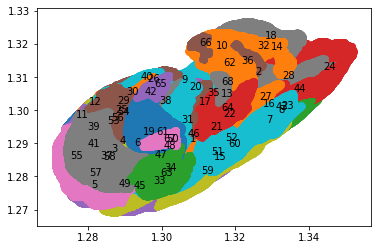

In [81]:
np.random.seed(33)
roi_n = list(range(1,69))
rvec = np.random.rand(3,3)
tvec = np.array([[1],[1],[1]], dtype=np.float32)
fx = fy = 0.8
cx = cy = 0.5
plt.figure()
cameraMatrix = np.array([[fx,0,cx],[0,fy,cy],[0,0,1]])
for i,lbl in enumerate(labels):
    a = cv2.projectPoints(lbl.pos, rvec, tvec, cameraMatrix, None)[0]
    txt_pos_x = lbl.pos[:,0].mean()
    txt_pos_y = lbl.pos[:,1].mean()
    txt_pos_z = lbl.pos[:,2].mean()
    txt_pos = np.array([txt_pos_x, txt_pos_y, txt_pos_z])
    b = cv2.projectPoints(txt_pos, rvec, tvec, cameraMatrix, None)[0]
    plt.scatter(a[:,0,0], a[:,0,1])
    plt.annotate(roi_n[i],(b[0,0,0], b[0,0,1]))

In [65]:
tvec.dtype

dtype('int64')

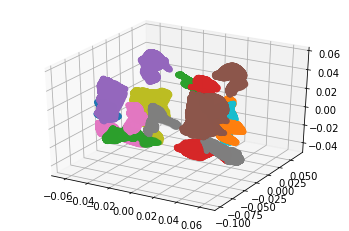

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for lbl in labels[0:20]:
    pos = lbl.pos
    X = pos[:,0]
    Y = pos[:,1]
    Z = pos[:,2]
    ax.scatter(X,Y,Z)

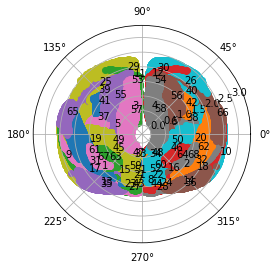

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
for i,lbl in enumerate(labels):
    pos = lbl.pos
    X = pos[:,0]
    Y = pos[:,1]
    Z = pos[:,2]
    r = np.sqrt(X**2 + Y**2 + Z**2)
    phi = np.arctan2(Y, X)
    theta = np.arccos(Z/r)
    
    txt_pos_x = lbl.pos[:,0].mean()
    txt_pos_y = lbl.pos[:,1].mean()
    txt_pos_z = lbl.pos[:,2].mean()
    
    r_txt = np.sqrt(txt_pos_x**2 + txt_pos_y**2 + txt_pos_z**2)
    phi_txt = np.arctan2(txt_pos_y, txt_pos_x)
    theta_txt = np.arccos(txt_pos_z/r_txt)
    ax.scatter(phi, theta, cmap='gray')
    ax.annotate(roi_n[i], (phi_txt, theta_txt))

In [87]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(data)
# fig = px.scatter_3d(df, x='x', y='y', z='z')
fig = px.scatter_3d(labels[50].pos, x=0, y=1, z=2)
fig.show()

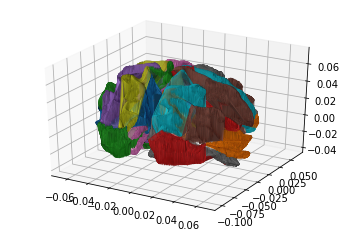

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for lbl in labels:
    pos = lbl.pos
    X = pos[:,0]
    Y = pos[:,1]
    Z = pos[:,2]
    ax.plot_trisurf(X,Y,Z)